# Projeto Covid - Situação Brasil
## Por: Michel Souza Santana
> Data: 21/01/2023

* Fonte: https://www.kaggle.com/datasets/shree1992/housedata

## Questão de Negócio
> Identificar o problema de negócio a ser resolvido

* Os mercados imobiliários, como os de Sydney e Melbourne, apresentam uma oportunidade interessante para os analistas de dados analisarem e preverem para onde os preços dos imóveis estão se movendo. A previsão dos preços dos imóveis está se tornando cada vez mais importante e benéfica. Os preços dos imóveis são um bom indicador tanto da condição geral do mercado quanto da saúde econômica de um país. Considerando os dados fornecidos, estamos lidando com um grande conjunto de registros de vendas de imóveis armazenados em um formato desconhecido e com problemas de qualidade de dados desconhecidos

## Entendimento do Negócio
> ...


## Coleta de Dados
> ...


In [637]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import plotly.express as px

> O comando abaixo remove a limitação de visualização das colunas e linhas

In [638]:
pd.set_option('display.max_columns', None) #colunas
pd.set_option('display.max_rows', None)

In [639]:
df = pd.read_csv('archive/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Tradução dos indices
* price: preço	
* bedrooms: quartos de dormir	
* bathrooms: banheiros	
* sqft_living: sqft_living
* sqft_lot: sqft_lot	
* floors: pisos	
* waterfront: beira-mar
* view: visualizar	
* condition: condição	
* sqft_above: acima de
* sqft_basement: porão
* yr_built: ano_construído
* yr_renovated: ano_renovado	
* street: rua	
* city: cidade
* statezip: código postal	
* country: país

In [640]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [641]:
df_zip = pd.read_csv('archive/simplemaps_us/uszips.csv')
df_zip.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [642]:
df_zip.dtypes

zip                   int64
lat                 float64
lng                 float64
city                 object
state_id             object
state_name           object
zcta                   bool
parent_zcta         float64
population          float64
density             float64
county_fips           int64
county_name          object
county_weights       object
county_names_all     object
county_fips_all      object
imprecise              bool
military               bool
timezone             object
dtype: object

## Limpeza dos Dados
> ...


### Limpeza dos dados do dataframe com os dados dos imóveis

In [643]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [644]:
df['bedrooms'] = df['bedrooms'].astype('int64')

In [645]:
df['statezip'] = df['statezip'].str.replace('WA ', '')
df['statezip'] = df['statezip'].astype('int64')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052,USA


### Limpeza do dados Com códigos postais

In [646]:
df_zip.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [647]:
df_zip.drop(columns=['zcta', 'parent_zcta', 'density',	'county_fips', 'county_name', 'county_weights',	'county_names_all', 'county_fips_all', 'imprecise', 'military', 'timezone'], inplace=True)
df_zip.head()

,zip,lat,lng,city,state_id,state_name,population
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,16773.0
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,37083.0
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,45652.0
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,6231.0
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,26502.0


In [648]:
df.shape

(4600, 18)

In [649]:
df = df.merge(df_zip, left_on='statezip', right_on='zip', suffixes=('', '_right'))
df.shape

(4600, 25)

In [650]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zip,lat,lng,city_right,state_id,state_name,population
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,USA,98133,47.7399,-122.34432,Seattle,WA,Washington,49476.0
1,2014-05-05,435000.0,5,2.00,1840,9240,1.0,0,0,4,1540,300,1942,1958,14013 Ashworth Ave N,Seattle,98133,USA,98133,47.7399,-122.34432,Seattle,WA,Washington,49476.0
2,2014-05-05,379950.0,4,1.75,1970,9389,1.0,0,0,5,1140,830,1960,0,1701 N 204th Pl,Shoreline,98133,USA,98133,47.7399,-122.34432,Seattle,WA,Washington,49476.0
3,2014-05-05,449250.0,4,2.00,1480,3844,1.5,0,0,5,1480,0,1928,1970,519 N 104th St,Seattle,98133,USA,98133,47.7399,-122.34432,Seattle,WA,Washington,49476.0
4,2014-05-05,329950.0,2,1.00,1140,5250,1.5,0,0,4,1140,0,1949,1985,14017 Roslyn Pl N,Seattle,98133,USA,98133,47.7399,-122.34432,Seattle,WA,Washington,49476.0


In [651]:
df.drop(columns=['country', 'zip', 'city_right'], inplace=True)

In [652]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,lat,lng,state_id,state_name,population
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,47.7399,-122.34432,WA,Washington,49476.0
1,2014-05-05,435000.0,5,2.00,1840,9240,1.0,0,0,4,1540,300,1942,1958,14013 Ashworth Ave N,Seattle,98133,47.7399,-122.34432,WA,Washington,49476.0
2,2014-05-05,379950.0,4,1.75,1970,9389,1.0,0,0,5,1140,830,1960,0,1701 N 204th Pl,Shoreline,98133,47.7399,-122.34432,WA,Washington,49476.0
3,2014-05-05,449250.0,4,2.00,1480,3844,1.5,0,0,5,1480,0,1928,1970,519 N 104th St,Seattle,98133,47.7399,-122.34432,WA,Washington,49476.0
4,2014-05-05,329950.0,2,1.00,1140,5250,1.5,0,0,4,1140,0,1949,1985,14017 Roslyn Pl N,Seattle,98133,47.7399,-122.34432,WA,Washington,49476.0


## Exploração dos Dados
> ...


In [653]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [654]:
df.shape

(4600, 22)

In [655]:
df.isnull().sum().sum()

0

In [656]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                  int64
lat                     float64
lng                     float64
state_id                 object
state_name               object
population              float64
dtype: object

In [657]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
lat                77
lng                77
state_id            1
state_name          1
population         77
dtype: int64

In [658]:
Counter(df['waterfront'] == 0)

Counter({True: 4567, False: 33})

In [659]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip,lat,lng,population
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,98079.379783,47.568329,-122.205291,34933.545435
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,53.142102,0.132756,0.156863,13251.181809
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.171400,-122.472600,225.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.495630,-122.323995,25650.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,98072.000000,47.586830,-122.232000,34455.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,98117.000000,47.676160,-122.124740,43482.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,98354.000000,47.761510,-121.357400,71940.000000


In [660]:
(df['price'] == 0).sum()

49

In [661]:
df['price'].replace(0, np.nan, inplace=True)
df.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
lat               0
lng               0
state_id          0
state_name        0
population        0
dtype: int64

In [662]:
df['price'].fillna(value=df['price'].mean(), inplace=True)
df.isnull().sum().sum()

0

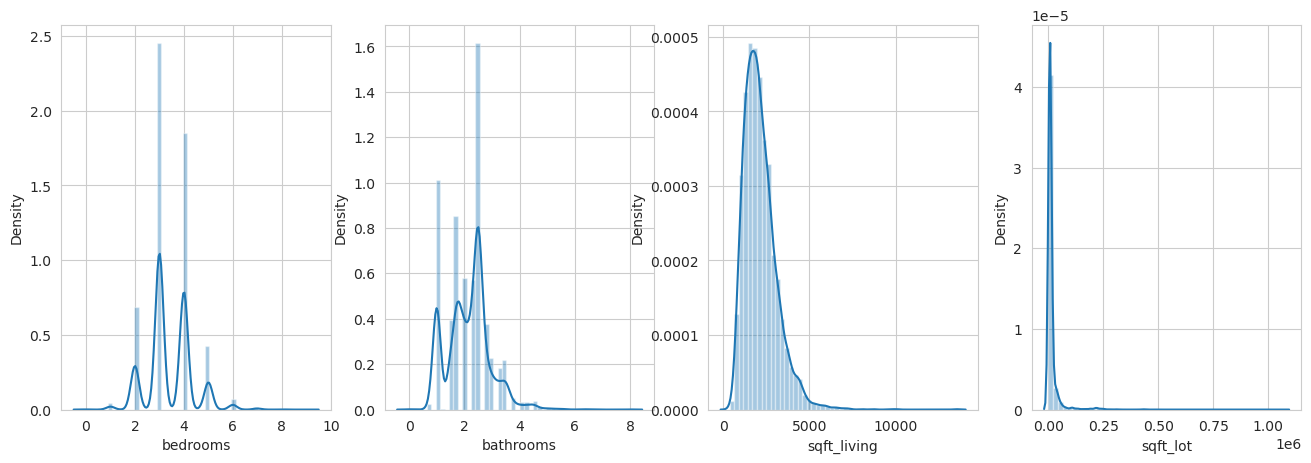

In [663]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (16, 5))
plt.subplot(1,4,1)
sns.distplot(df['bedrooms'])
plt.subplot(1,4,2)
sns.distplot(df['bathrooms'])
plt.subplot(1,4,3)
sns.distplot(df['sqft_living'])
plt.subplot(1,4,4)
sns.distplot(df['sqft_lot'])
plt.show()

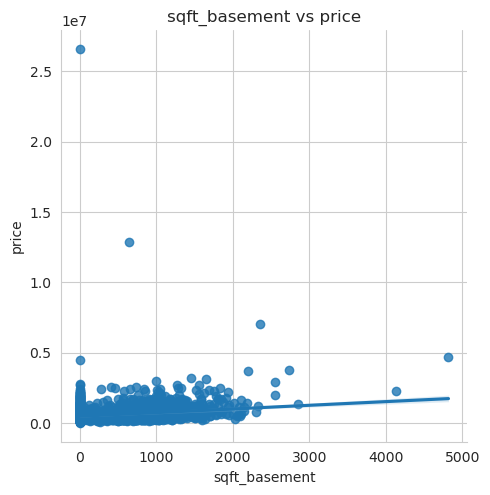

In [664]:
ax = sns.lmplot(data = df, x = 'sqft_basement', y = 'price')
ax.set(title = 'sqft_basement vs price')

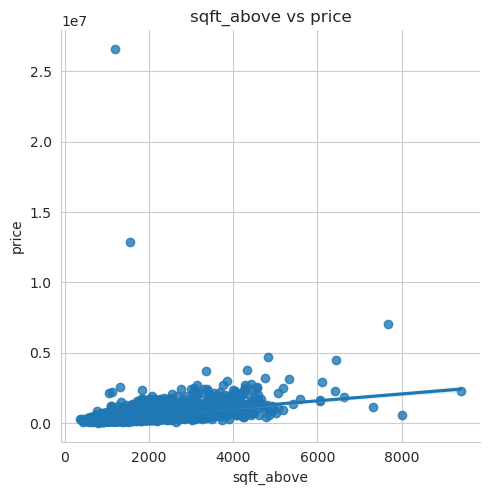

In [665]:
ax = sns.lmplot(data = df, x = 'sqft_above', y = 'price')
ax.set(title = 'sqft_above vs price')

<AxesSubplot:xlabel='price', ylabel='Density'>

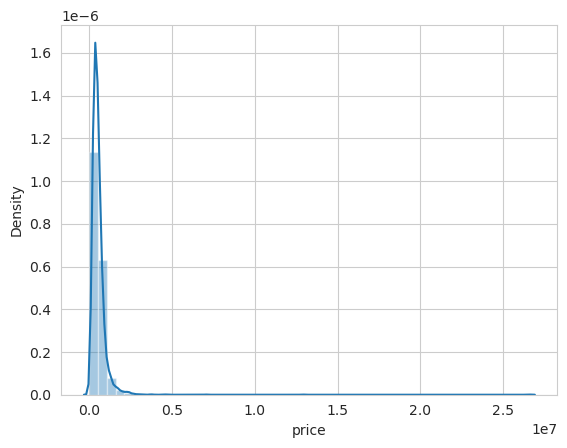

In [666]:
sns.distplot(df['price'])

In [667]:
def draw_boxplot(feature):
    sns.set_style('whitegrid')
    ax = sns.boxplot(x = df[feature], y = np.log(df['price']))
    ax.set_ylabel('price (log)')
    ax.set(title = f'{feature} VS price')

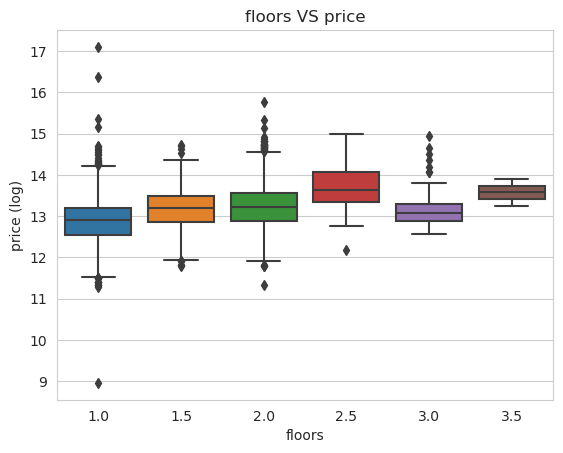

In [668]:
draw_boxplot('floors')

In [669]:
fig = px.box(df, y = "price", x = "waterfront",)
fig.update_layout(yaxis_range = [0 , 2000000], width = 800, height = 600)
fig.show()

In [670]:
year_ren_trend = pd.concat([df['price'], df['yr_renovated']], axis = 1)
fig = px.scatter(df, x = 'yr_renovated', y = 'price', title = 'Price vs Year renovated', labels = dict(price = "Price ", yr_renovated = "Year "))
fig.update_layout(yaxis_range=[0 , 2000000], xaxis_range = [1912 , 2018], width = 800, height = 600)
fig.show()

<AxesSubplot:>

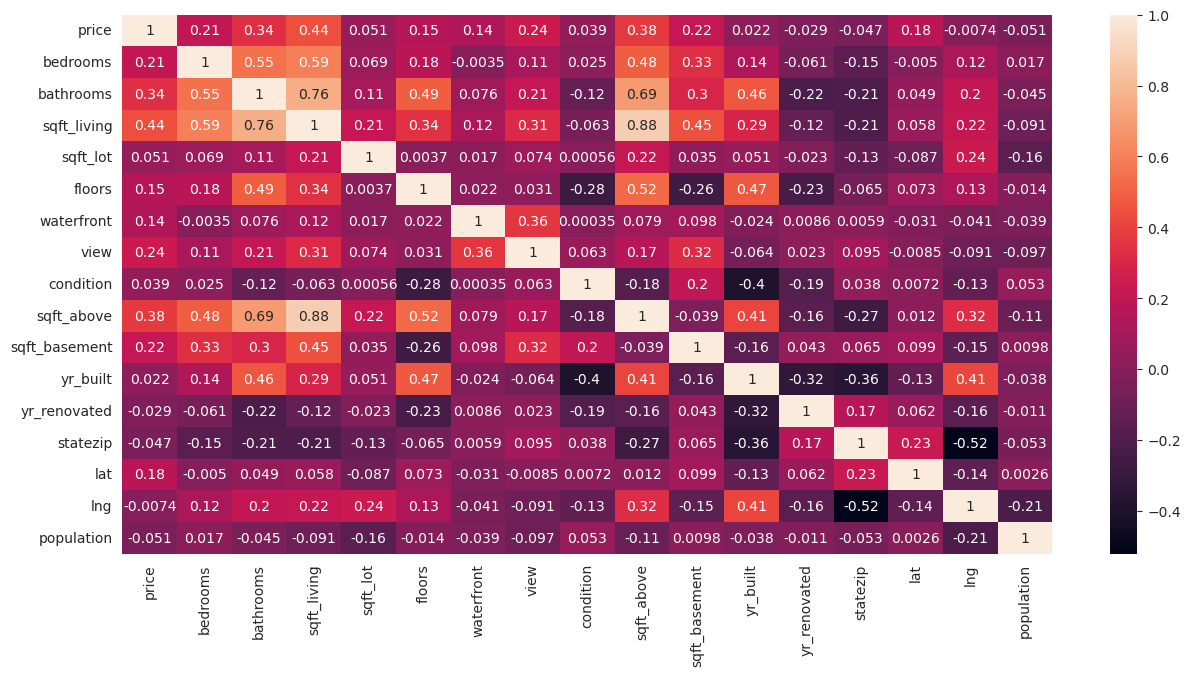

In [671]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot = True)

## Modelagem dos Dados
> ...


## Algoritmos de Machine Laearning
> ...


## Avaliação do algoritimo
> ...


## Storytelling
> ...